**Case File #003 – Classifier Arena**-[Day 3]

---
Dataset: Mental Health and Burnout in the Workplace

Importing Libraries and Loading the Dataset
In this step, I imported essential libraries for data processing, visualization, feature selection, and regression modeling. I also mounted Google Drive to access the dataset and loaded it using pandas. This dataset will be used for analyzing factors affecting employee stress levels.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ACM-TASKS/mental_health_workplace_survey.csv')
df.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['EmployeeID', 'Age', 'Gender', 'Country', 'JobRole', 'Department',
       'YearsAtCompany', 'WorkHoursPerWeek', 'RemoteWork', 'BurnoutLevel',
       'JobSatisfaction', 'StressLevel', 'ProductivityScore', 'SleepHours',
       'PhysicalActivityHrs', 'CommuteTime', 'HasMentalHealthSupport',
       'ManagerSupportScore', 'HasTherapyAccess', 'MentalHealthDaysOff',
       'SalaryRange', 'WorkLifeBalanceScore', 'TeamSize', 'CareerGrowthScore',
       'BurnoutRisk'],
      dtype='object')

Cleaning:   
Dropped non-predictive columns (EmployeeID, BurnoutRisk) to form features X, and assigned BurnoutRisk as the target y. Displayed data types of feature columns using X.dtypes.

In [ ]:
X = df.drop(["EmployeeID", "BurnoutRisk"], axis=1)
y = df["BurnoutRisk"]
X.dtypes

,0
Age,int64
Gender,object
Country,object
JobRole,object
Department,object
YearsAtCompany,int64
WorkHoursPerWeek,int64
RemoteWork,object
BurnoutLevel,float64
JobSatisfaction,float64


Encoding and Feature Selection   
We encoded SalaryRange using ordinal encoding and applied one-hot encoding to categorical columns to prepare the dataset for modeling. Non-essential columns were dropped, and the target variable was set as BurnoutRisk


In [ ]:
ordinal_map = {
    '<40K': 0,
    '40K-60K': 1,
    '60K-80K': 2,
    '80K-100K': 3,
    '100K+': 4
}
df['SalaryRangeEncoded'] = df['SalaryRange'].map(ordinal_map)
one_hot_cols = [
    'Gender', 'Country', 'JobRole', 'Department',
    'RemoteWork', 'HasMentalHealthSupport', 'HasTherapyAccess'
]
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)
X = df_encoded.drop(['EmployeeID', 'SalaryRange', 'BurnoutRisk'], axis=1)
X['SalaryRangeEncoded'] = df['SalaryRangeEncoded']
y = df_encoded['BurnoutRisk']

Data Splitting & Scaling    
We split the dataset into training and testing sets (80–20 split) and applied standardization using StandardScaler to normalize the feature values for better model performance. A Logistic Regression model was then trained on the scaled data.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model=LogisticRegression(max_iter=1000)
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

Logistic Regression: Accuracy Evaluation    
We used the trained logistic regression model to predict burnout on the test set and evaluated it using accuracy score to measure the proportion of correct predictions.

In [ ]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Accuracy: {accuracy:.4f}")


Accuracy: 0.9883


LDA- Model Training   
We trained an LDA classifier on the scaled dataset to classify employees as at-risk or not based on workplace features.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

LDA Accuracy Evaluation    
We predicted burnout risk using the trained LDA model.

In [ ]:
y_pred_ldamodel = ldamodel.predict(X_test_scaled)
accuracy_lda = accuracy_score(y_test, y_pred_ldamodel)
print(f"LDA Accuracy: {accuracy_lda:.4f}")

LDA Accuracy: 0.9500


Confusion Matrix – Logistic Regression    
Shows how well the model distinguishes between burnout and non-burnout cases using actual vs predicted values.

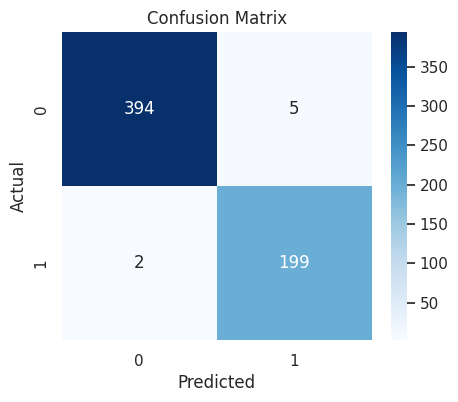

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix – Linear Discriminant Analysis (LDA)     
Visualizes how the LDA model performs in classifying burnout risk using predicted vs actual labels.

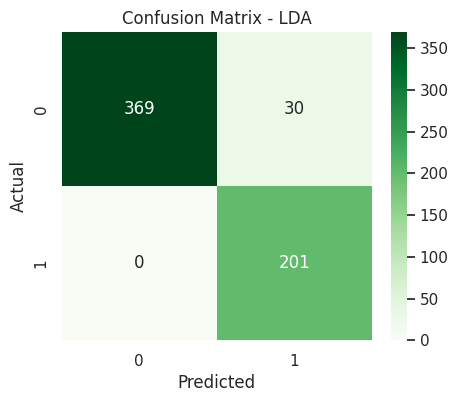

In [ ]:
cm_lda = confusion_matrix(y_test, y_pred_ldamodel)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LDA")
plt.show()

ROC Curve Comparison – Logistic Regression vs LDA    
This ROC curve compares both models’ ability to distinguish between burnout and non-burnout cases. The AUC (Area Under the Curve) indicates how well each model performs—the higher, the better.


ROC-AUC Score(Logistic Regression): 0.9997
ROC-AUC Score(LDA): 0.9993


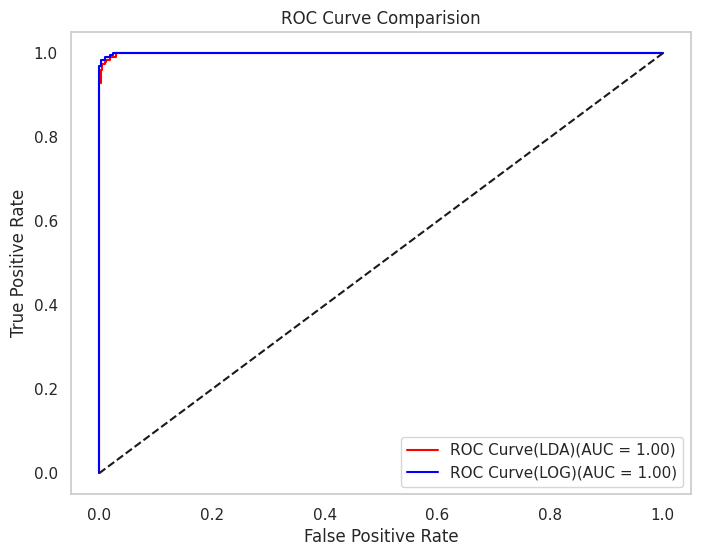

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = model.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score(Logistic Regression): {roc_auc:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

y_proba_lda=ldamodel.predict_proba(X_test_scaled)[:,1]
roc_auc_lda=roc_auc_score(y_test,y_proba_lda)
print(f"ROC-AUC Score(LDA): {roc_auc_lda:.4f}")
fpr_lda,tpr_lda,thresholds_lda=roc_curve(y_test,y_proba_lda)




plt.figure(figsize=(8,6))
plt.plot(fpr_lda, tpr_lda, label=f"ROC Curve(LDA)(AUC = {roc_auc_lda:.2f})", color='red')
plt.plot(fpr, tpr, label=f"ROC Curve(LOG)(AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparision")
plt.legend()
plt.grid()
plt.show()

Summary:   
Preprocessed data using ordinal and one-hot encoding.

Scaled features with StandardScaler.

Trained Logistic Regression and LDA models.

Evaluated using Accuracy, Confusion Matrix, and ROC-AUC.

Both models performed well, with Logistic slightly better in ROC-AUC.